<a href="https://colab.research.google.com/github/Shivam-Verma1/MultiThreading102103252/blob/main/Multi_Threading_102103252ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
import threading
import matplotlib.pyplot as plt
import psutil


# Function to multiply matrices
def multiply_matrices(start, end, A, B, result):
    for i in range(start, end):
        result[i] = np.dot(A[i], B[i])

# Generate random matrices
num_matrices = 100
matrix_size = 1000

A_matrices = [np.random.rand(matrix_size, matrix_size) for _ in range(num_matrices)]
B_matrices = [np.random.rand(matrix_size, matrix_size) for _ in range(num_matrices)]

# Number of threads to use
num_threads_list = [1, 2, 3, 4, 5, 6, 7, 8]
time_taken_list = []
cpu_usage_list = []

for num_threads in num_threads_list:
    # Create result matrices
    result_matrices = [np.zeros((matrix_size, matrix_size)) for _ in range(num_matrices)]

    # Split work among threads
    start_time = time.time()
    threads = []
    batch_size = num_matrices // num_threads

    for i in range(num_threads):
        start = i * batch_size
        end = (i + 1) * batch_size if i < num_threads - 1 else num_matrices
        thread = threading.Thread(target=multiply_matrices, args=(start, end, A_matrices, B_matrices, result_matrices))
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

    end_time = time.time()
    time_taken = end_time - start_time
    time_taken_list.append(time_taken)

    # Measure CPU usage
    cpu_usage = psutil.cpu_percent(interval=1)
    cpu_usage_list.append(cpu_usage)

    print(f"Time taken with {num_threads} threads: {time_taken:.2f} seconds")
    print(f"CPU usage with {num_threads} threads: {cpu_usage}% \n")

# Print result table
print("\nResult Table:")
print("| T  | Time Taken (Sec) |")
print("|----|------------------|")
for i in range(len(num_threads_list)):
    print(f"| {num_threads_list[i]}  | {time_taken_list[i]:.2f}              |")


Time taken with 1 threads: 8.96 seconds
CPU usage with 1 threads: 17.7% 

Time taken with 2 threads: 8.98 seconds
CPU usage with 2 threads: 30.5% 

Time taken with 3 threads: 7.32 seconds
CPU usage with 3 threads: 13.7% 

Time taken with 4 threads: 9.29 seconds
CPU usage with 4 threads: 17.7% 

Time taken with 5 threads: 9.10 seconds
CPU usage with 5 threads: 13.1% 

Time taken with 6 threads: 7.26 seconds
CPU usage with 6 threads: 9.0% 

Time taken with 7 threads: 9.04 seconds
CPU usage with 7 threads: 10.0% 

Time taken with 8 threads: 9.32 seconds
CPU usage with 8 threads: 15.7% 


Result Table:
| T  | Time Taken (Sec) |
|----|------------------|
| 1  | 8.96              |
| 2  | 8.98              |
| 3  | 7.32              |
| 4  | 9.29              |
| 5  | 9.10              |
| 6  | 7.26              |
| 7  | 9.04              |
| 8  | 9.32              |


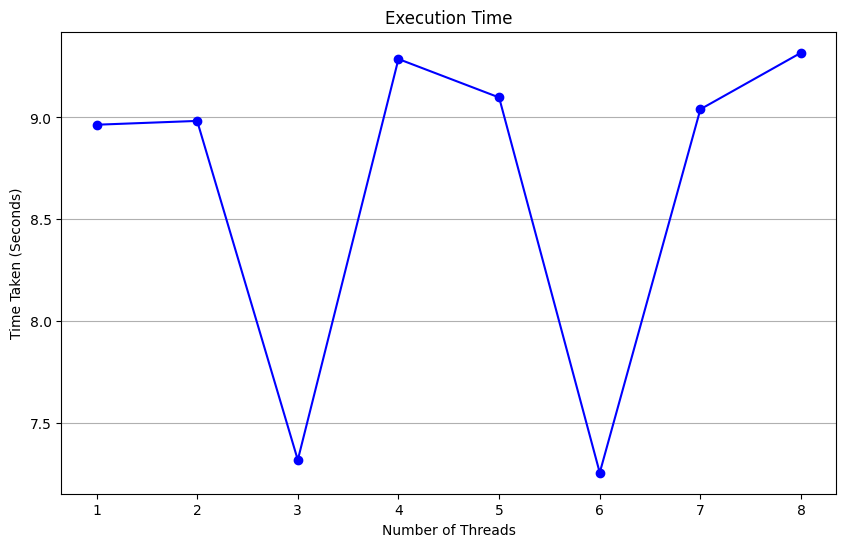

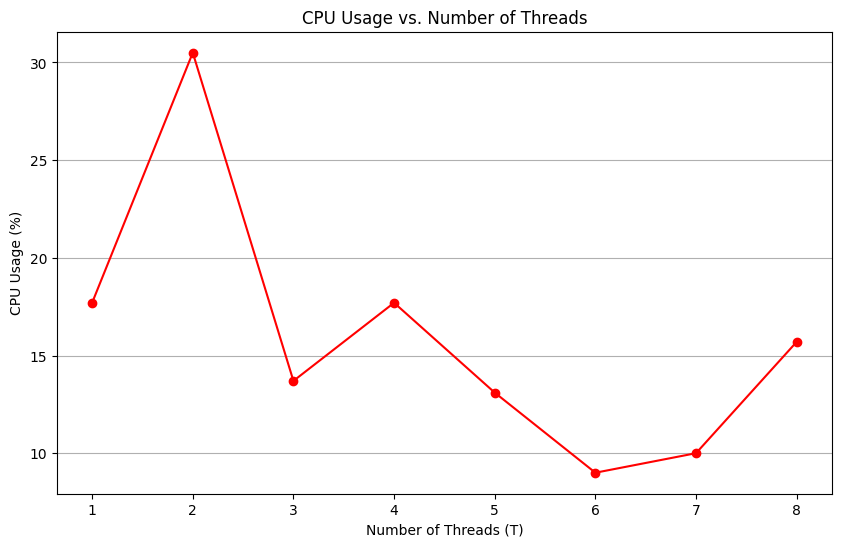

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(num_threads_list, time_taken_list, marker='o', linestyle='-', color='b')
plt.title('Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (Seconds)')
plt.grid(axis='y')
plt.xticks(num_threads_list)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(num_threads_list, cpu_usage_list, marker='o', linestyle='-', color='r')
plt.title('CPU Usage vs. Number of Threads')
plt.xlabel('Number of Threads (T)')
plt.ylabel('CPU Usage (%)')
plt.grid(axis='y')
plt.xticks(num_threads_list)
plt.show()